## POSTTEST 8

## Erman Parni Simanjuntak
## 2009106046

## Import Library

In [2]:
from tensorflow import keras
from keras import datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.load("colorectal_histology", batch_size = -1, split=["train[:70%]","train[:30%]"], as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ASUS\tensorflow_datasets\colorectal_histology\2.0.0.incompleteLM5L70\colorectal_histology-t…

Dataset colorectal_histology downloaded and prepared to C:\Users\ASUS\tensorflow_datasets\colorectal_histology\2.0.0. Subsequent calls will reuse this data.


## Menampilkan Dataset

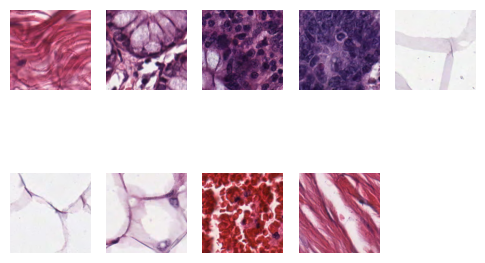

In [7]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,5, i+1)
    plt.imshow(x_train_raw[i], cmap='gray')
    plt.axis("off")
plt.show(10)

## Encoding

In [8]:
y_train = keras.utils.to_categorical(y_train_raw, 13)
y_test = keras.utils.to_categorical(y_test_raw, 13)

## Shape pada dataset

In [9]:
x_train_raw.shape

TensorShape([3500, 150, 150, 3])

In [10]:
x_test_raw.shape

TensorShape([1500, 150, 150, 3])

## Reshape Gambar

In [11]:
x_train=tf.image.resize(x_train_raw,(28,28))
x_test=tf.image.resize(x_test_raw,(28,28))

In [12]:
x_train=np.reshape(x_train.numpy(),(3500,2352))
x_test=np.reshape(x_test.numpy(),(1500,2352))

In [13]:
x_train = x_train.astype('float32')/255

In [14]:
x_test = x_test.astype('float32')/255

## Modeling

In [15]:
modeling = Sequential()

In [16]:
modeling.add(Dense(512, activation='relu', input_dim=2352))

In [17]:
modeling.add(Dense(64, activation='relu'))
modeling.add(Dense(64, activation='relu'))

In [18]:
modeling.add(Dense(13, activation='softmax'))

## Menampilkan Model

In [19]:
modeling.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1204736   
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 13)                845       
                                                                 
Total params: 1,242,573
Trainable params: 1,242,573
Non-trainable params: 0
_________________________________________________________________


## Optimizer Model

In [20]:
modeling.compile(optimizer = 'sgd', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
history=modeling.fit(x_train, y_train, epochs=20,batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
55/55 [==============================] - 3s 31ms/step - loss: 1.9656 - accuracy: 0.2029 - val_loss: 1.7821 - val_accuracy: 0.2773
Epoch 2/20
55/55 [==============================] - 1s 20ms/step - loss: 1.6345 - accuracy: 0.3220 - val_loss: 1.5552 - val_accuracy: 0.3420
Epoch 3/20
55/55 [==============================] - 1s 21ms/step - loss: 1.5033 - accuracy: 0.3817 - val_loss: 1.4563 - val_accuracy: 0.3733
Epoch 4/20
55/55 [==============================] - 1s 20ms/step - loss: 1.3950 - accuracy: 0.4126 - val_loss: 1.3341 - val_accuracy: 0.5247
Epoch 5/20
55/55 [==============================] - 1s 19ms/step - loss: 1.3283 - accuracy: 0.4394 - val_loss: 1.2514 - val_accuracy: 0.4453
Epoch 6/20
55/55 [==============================] - 1s 17ms/step - loss: 1.2373 - accuracy: 0.4757 - val_loss: 1.2311 - val_accuracy: 0.4440
Epoch 7/20
55/55 [==============================] - 1s 19ms/step - loss: 1.2058 - accuracy: 0.4751 - val_loss: 1.1920 - val_accuracy: 0.4787
Epoch 8/20
55

In [22]:
hasil = modeling.evaluate(x_test, y_test)
print("Hasil:\n")
print("Akurasi : ", hasil[1])
print("Loss : ", hasil[0])

47/47 [==============================] - 0s 8ms/step - loss: 1.0779 - accuracy: 0.5227
Hasil:

Akurasi :  0.5226666927337646
Loss :  1.0778974294662476


In [23]:
print("Hasil:\n")
print("Validasi Loss     : ", history.history['val_loss'][-1])
print("Validasi Akurasi : ", history.history['val_accuracy'][-1])

Hasil:

Validasi Loss     :  1.0778974294662476
Validasi Akurasi :  0.5226666927337646
